# Algorithme des k plus proches voisins

L’algorithme des k plus proches voisins (de l’anglais
*k-nearest-neighbors* abrégé en kNN) est un algorithme simple
d’apprentissage utilisé en *machine learning*. Il permet de classifier
un jeu de données selon un critère précis, comme par exemple, répondre
Oui ou Non à une question ou encore indiquer si une image représente un
chien ou un chat.

## Présentation du problème

En 1936, le statisticien britannique Ronald Fisher a utilisé un jeu de
données basé sur 150 fleurs d’iris, appartenant à 3 variétés différentes
: Setosa, Versicolor et Virginica. Il souhaitait pouvoir déterminer la
variété d’une fleur d’iris prélevée au hasard dans la nature.

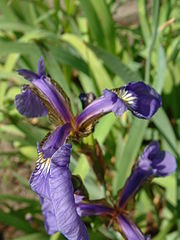

*Iris setosa*

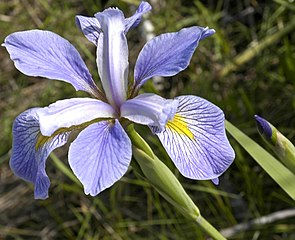

*Iris virginica*

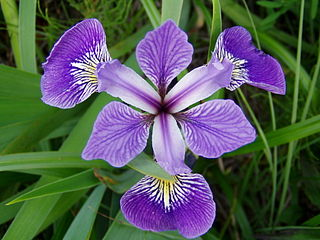

*Iris versicolor*

1.  En examinant seulement les photos ci-dessus, donner quelques
    critères discriminants qui permettraient de classifier les fleurs
    d’iris.

2.  En vous aidant de la photo ci-dessous, préciser quelles sont les
    caractéristiques des fleurs mesurées par Fisher.

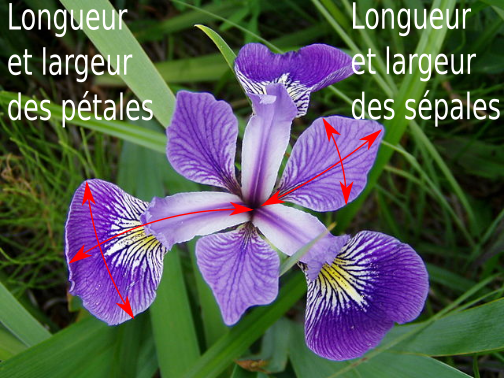

## Étude du problème à résoudre


Le fichier `iris.csv` contient les relevés des 150 iris effectués par Ronald Fisher. Ce fichier est disponible sur
l’ENT dans la parie **Algorithme des plus proches voisins** (moodle).

L’objectif de cette partie est d’exploiter et représenter graphiquement ce jeu de données en Python.

On donne 2 scripts. Le premier permet de transformer les données du fichier en trois listes. Le second permet de représenter graphiquement chacune de ces listes.

In [1]:
from csv import reader
from matplotlib import pyplot

# On définit trois variables qui vont regrouper certaines données du fichier `iris.csv`
variete = []
sew = []
pew = []

# Traitement du fichier pour récupérer des données dans les trois listes
with open("iris.csv",mode='r',encoding='utf8',newline='') as f:
    data = reader(f,delimiter=',')
    for row in data:
        if row[0] != 'ID':
            variete.append(row[0][5:])
            sew.append(int(row[2]))
            pew.append(int(row[4]))

In [2]:
print(pew)

[2, 2, 2, 2, 2, 4, 3, 2, 2, 1, 2, 2, 1, 1, 2, 4, 4, 3, 3, 3, 2, 4, 2, 5, 2, 2, 4, 2, 2, 2, 2, 4, 1, 2, 2, 2, 2, 1, 2, 2, 3, 3, 2, 6, 4, 3, 2, 2, 2, 2, 14, 15, 15, 13, 15, 13, 16, 10, 13, 14, 10, 15, 10, 14, 13, 14, 15, 10, 15, 11, 18, 13, 15, 12, 13, 14, 14, 17, 15, 10, 11, 10, 12, 16, 15, 16, 15, 13, 13, 13, 12, 14, 12, 10, 13, 12, 13, 13, 11, 13, 25, 19, 21, 18, 22, 21, 17, 18, 18, 25, 20, 19, 21, 20, 24, 23, 18, 22, 23, 15, 23, 20, 20, 18, 21, 18, 18, 18, 21, 16, 19, 20, 22, 15, 14, 23, 24, 18, 18, 21, 24, 23, 19, 23, 25, 23, 19, 20, 23, 18]


In [3]:
# Paramétrage des axes
axes = pyplot.gca()
axes.set_xlabel('Largeur des sépales')
axes.set_ylabel("Largeur des pétales")

for i in range(150):
    if variete[i]=='setosa':
        color='orange'
    elif variete[i]=='virginica':
        color='blue'
    else:
        color='green'
    pyplot.scatter(sew[i], pew[i],c=color)

# Ajout des trois iris du tableau
pyplot.scatter(35,5,c='red')
pyplot.scatter(26,15,c='red')
pyplot.scatter(31,17,c='red')

In [4]:
pyplot.show()

## Recherche d’un algorithme de classification

L’algorithme kNN permet de prédire la classe (variété) du sujet à
étudier en fonction de ses k plus proches voisins. L’entier k doit être
optimisé pour chaque étude. Une bonne méthode consiste à prendre
$k=\sqrt{n}$ où $n$ est le nombre de sujets étudiés dans la base de
départ.

In [5]:
# Calcul de la valeur de k
from math import sqrt
k=int(sqrt(150))
print(int(k))

12


In [6]:
# fonction distance(xA,yA,xB,yB) qui calcule la distance euclidienne entre les deux points A et B.

def distance(xA,yA,xB,yB):
    d = sqrt((xA-xB)**2+(yA-yB)**2)
    return d

assert distance(1,1,4,5)==5,'erreur de formule'

In [7]:
# La liste base comprend 150 listes correspondant à chaque iris. 
# Dans chaque liste, on retrouve sa classe et les mesures sew et pew.
base=[]
for i in range(150):
    iris=[sew[i],pew[i],variete[i]]
    base.append(iris)
    
print(base)

[[35, 2, 'setosa'], [30, 2, 'setosa'], [32, 2, 'setosa'], [31, 2, 'setosa'], [36, 2, 'setosa'], [39, 4, 'setosa'], [34, 3, 'setosa'], [34, 2, 'setosa'], [29, 2, 'setosa'], [31, 1, 'setosa'], [37, 2, 'setosa'], [34, 2, 'setosa'], [30, 1, 'setosa'], [30, 1, 'setosa'], [40, 2, 'setosa'], [44, 4, 'setosa'], [39, 4, 'setosa'], [35, 3, 'setosa'], [38, 3, 'setosa'], [38, 3, 'setosa'], [34, 2, 'setosa'], [37, 4, 'setosa'], [36, 2, 'setosa'], [33, 5, 'setosa'], [34, 2, 'setosa'], [30, 2, 'setosa'], [34, 4, 'setosa'], [35, 2, 'setosa'], [34, 2, 'setosa'], [32, 2, 'setosa'], [31, 2, 'setosa'], [34, 4, 'setosa'], [41, 1, 'setosa'], [42, 2, 'setosa'], [31, 2, 'setosa'], [32, 2, 'setosa'], [35, 2, 'setosa'], [36, 1, 'setosa'], [30, 2, 'setosa'], [34, 2, 'setosa'], [35, 3, 'setosa'], [23, 3, 'setosa'], [32, 2, 'setosa'], [35, 6, 'setosa'], [38, 4, 'setosa'], [30, 3, 'setosa'], [38, 2, 'setosa'], [32, 2, 'setosa'], [37, 2, 'setosa'], [33, 2, 'setosa'], [32, 14, 'versicolor'], [32, 15, 'versicolor'], [

In [8]:
# fonction kNN(liste,x,y,k) qui renvoie la classe d’un nouvel iris

def kNN(liste,x,y,k):
    """
    Les paramètres:
    - liste est la base des iris
    - x représente la mesure du sépale du nouvel iris à classifier
    - y représente la mesure du pétale du nouvel iris à classifier
    - k est le coefficient de l'agorithme kNN
    
    La fonction nNN renvoie la classe du nouvel iris : setosa, virginca, versicolor
    """
    
    # 1/ on crée une liste vide distance_et_variete
    distance_variete = []
    
    # 2/ on calcule les distances entre le nouvel iris et tous les iris de la base.
    # Puis ajoute dans la liste distance_et_variete chaque tuple (distance, variete)
    for i in range(150):
        d = distance(x,y,base[i][0],base[i][1])
        distance_variete.append((d,base[i][2]))
        
    # on trie avec la méthode sort() la liste des tuples (distance, classe) selon la distance
    distance_variete.sort()
    
    # on crée une nouvelle liste vide varietes qui va contenir la classe des k premiers iris triés
    varietes = []
    
    # on parcourt les k premiers tuples et on ajoute la classe dans la liste varietes
    for i in range(k):
        varietes.append(distance_variete[i][1])

    # la variable compteur_variete indique le nombre de fois qu'une classe est présente dans la liste variétés
    # La variable classe contient la classe la plus fréquente.
    compteur_variete = 0
    classe = 'virginica'
    
    # On parcourt la liste variétés. Pour chaque variété, on compte le nombre d'occurences.
    # On mémorise la classe la plus fréquente et son nombre d'occurences.
    for v in varietes:
        k=varietes.count(v)
        if k > compteur_variete:
            compteur_variete = k
            classe = v

    # on renvoie la classe qui a la plus forte occurence.
    return classe

In [10]:
# Tests des trois nouveaux iris du tableau
kNN(base,35,5,k)

'setosa'